In [16]:
import pandas as pd

In [17]:
data = pd.read_csv("datasets/raw_dataset.csv")
data

,aqi,co,datetime,no2,o3,pm10,pm25,so2,timestamp_local,timestamp_utc,ts,city_name
0,128,215.4,2025-03-04:11,25.7,92.1,99.7,45.67,29.2,2025-03-04T16:30:00,2025-03-04T11:00:00,1741086000,Ahmedabad
1,211,614.5,2025-03-04:10,81.5,37.8,209.0,101.00,39.0,2025-03-04T15:30:00,2025-03-04T10:00:00,1741082400,Ahmedabad
2,208,534.0,2025-03-04:09,71.0,34.2,201.0,99.00,37.5,2025-03-04T14:30:00,2025-03-04T09:00:00,1741078800,Ahmedabad
3,206,91.0,2025-03-04:08,40.2,42.0,141.8,97.91,25.5,2025-03-04T13:30:00,2025-03-04T08:00:00,1741075200,Ahmedabad
4,227,121.0,2025-03-04:07,56.0,61.1,170.8,113.25,45.3,2025-03-04T12:30:00,2025-03-04T07:00:00,1741071600,Ahmedabad
...,...,...,...,...,...,...,...,...,...,...,...,...
643,119,187.0,2025-03-01:14,127.5,7.8,72.5,42.50,19.0,2025-03-01T19:30:00,2025-03-01T14:00:00,1740837600,Gajuwaka
644,104,302.0,2025-03-01:13,127.0,5.8,78.0,37.00,18.0,2025-03-01T18:30:00,2025-03-01T13:00:00,1740834000,Gajuwaka
645,153,0.0,2025-03-01:12,67.0,12.9,73.0,55.00,17.0,2025-03-01T17:30:00,2025-03-01T12:00:00,1740830400,Gajuwaka
646,121,302.0,2025-03-01:11,133.0,6.6,92.0,43.00,17.0,2025-03-01T16:30:00,2025-03-01T11:00:00,1740826800,Gajuwaka


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   aqi              648 non-null    int64  
 1   co               648 non-null    float64
 2   datetime         648 non-null    object 
 3   no2              648 non-null    float64
 4   o3               648 non-null    float64
 5   pm10             648 non-null    float64
 6   pm25             648 non-null    float64
 7   so2              648 non-null    float64
 8   timestamp_local  648 non-null    object 
 9   timestamp_utc    648 non-null    object 
 10  ts               648 non-null    int64  
 11  city_name        648 non-null    object 
dtypes: float64(6), int64(2), object(4)
memory usage: 60.9+ KB


In [19]:
# droping unwanted columns
# timestamp_local, timestamp_utc, ts(unix time)
data = data.drop(['timestamp_local','timestamp_utc','ts'],axis=1)
data

,aqi,co,datetime,no2,o3,pm10,pm25,so2,city_name
0,128,215.4,2025-03-04:11,25.7,92.1,99.7,45.67,29.2,Ahmedabad
1,211,614.5,2025-03-04:10,81.5,37.8,209.0,101.00,39.0,Ahmedabad
2,208,534.0,2025-03-04:09,71.0,34.2,201.0,99.00,37.5,Ahmedabad
3,206,91.0,2025-03-04:08,40.2,42.0,141.8,97.91,25.5,Ahmedabad
4,227,121.0,2025-03-04:07,56.0,61.1,170.8,113.25,45.3,Ahmedabad
...,...,...,...,...,...,...,...,...,...
643,119,187.0,2025-03-01:14,127.5,7.8,72.5,42.50,19.0,Gajuwaka
644,104,302.0,2025-03-01:13,127.0,5.8,78.0,37.00,18.0,Gajuwaka
645,153,0.0,2025-03-01:12,67.0,12.9,73.0,55.00,17.0,Gajuwaka
646,121,302.0,2025-03-01:11,133.0,6.6,92.0,43.00,17.0,Gajuwaka


In [20]:
# Creating a new feature 'hour' to differentiate the time on a day
data['hour'] = data['datetime'].str[11:]
data

,aqi,co,datetime,no2,o3,pm10,pm25,so2,city_name,hour
0,128,215.4,2025-03-04:11,25.7,92.1,99.7,45.67,29.2,Ahmedabad,11
1,211,614.5,2025-03-04:10,81.5,37.8,209.0,101.00,39.0,Ahmedabad,10
2,208,534.0,2025-03-04:09,71.0,34.2,201.0,99.00,37.5,Ahmedabad,09
3,206,91.0,2025-03-04:08,40.2,42.0,141.8,97.91,25.5,Ahmedabad,08
4,227,121.0,2025-03-04:07,56.0,61.1,170.8,113.25,45.3,Ahmedabad,07
...,...,...,...,...,...,...,...,...,...,...
643,119,187.0,2025-03-01:14,127.5,7.8,72.5,42.50,19.0,Gajuwaka,14
644,104,302.0,2025-03-01:13,127.0,5.8,78.0,37.00,18.0,Gajuwaka,13
645,153,0.0,2025-03-01:12,67.0,12.9,73.0,55.00,17.0,Gajuwaka,12
646,121,302.0,2025-03-01:11,133.0,6.6,92.0,43.00,17.0,Gajuwaka,11


In [21]:
data['date'] = data['datetime'].str[:10]
data['date'] = pd.to_datetime(data['date'])
data

,aqi,co,datetime,no2,o3,pm10,pm25,so2,city_name,hour,date
0,128,215.4,2025-03-04:11,25.7,92.1,99.7,45.67,29.2,Ahmedabad,11,2025-03-04
1,211,614.5,2025-03-04:10,81.5,37.8,209.0,101.00,39.0,Ahmedabad,10,2025-03-04
2,208,534.0,2025-03-04:09,71.0,34.2,201.0,99.00,37.5,Ahmedabad,09,2025-03-04
3,206,91.0,2025-03-04:08,40.2,42.0,141.8,97.91,25.5,Ahmedabad,08,2025-03-04
4,227,121.0,2025-03-04:07,56.0,61.1,170.8,113.25,45.3,Ahmedabad,07,2025-03-04
...,...,...,...,...,...,...,...,...,...,...,...
643,119,187.0,2025-03-01:14,127.5,7.8,72.5,42.50,19.0,Gajuwaka,14,2025-03-01
644,104,302.0,2025-03-01:13,127.0,5.8,78.0,37.00,18.0,Gajuwaka,13,2025-03-01
645,153,0.0,2025-03-01:12,67.0,12.9,73.0,55.00,17.0,Gajuwaka,12,2025-03-01
646,121,302.0,2025-03-01:11,133.0,6.6,92.0,43.00,17.0,Gajuwaka,11,2025-03-01


In [22]:
data.describe()

,aqi,co,no2,o3,pm10,pm25,so2,date
count,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648
mean,164.265432,618.773765,76.517747,26.037037,114.389815,69.400941,34.595833,2025-03-02 11:46:40
min,52.000000,0.000000,1.000000,0.000000,16.000000,13.000000,1.000000,2025-03-01 00:00:00
25%,129.750000,92.275000,39.175000,8.200000,78.825000,46.000000,22.000000,2025-03-02 00:00:00
50%,165.000000,380.850000,59.600000,16.600000,108.100000,67.000000,28.500000,2025-03-02 00:00:00
75%,193.000000,897.650000,96.525000,31.450000,135.050000,87.212500,39.000000,2025-03-03 00:00:00
max,500.000000,9977.900000,507.000000,864.900000,1103.000000,225.000000,1341.000000,2025-03-04 00:00:00
std,50.901674,840.360132,58.188483,41.026603,69.284791,29.431831,54.268861,NaN


In [23]:
# since the data is recorded form the data 2025-03-01 to 2025-03-04 that does effect much
# so we can drop the date column
data = data.drop(['datetime','date'],axis=1)
data

,aqi,co,no2,o3,pm10,pm25,so2,city_name,hour
0,128,215.4,25.7,92.1,99.7,45.67,29.2,Ahmedabad,11
1,211,614.5,81.5,37.8,209.0,101.00,39.0,Ahmedabad,10
2,208,534.0,71.0,34.2,201.0,99.00,37.5,Ahmedabad,09
3,206,91.0,40.2,42.0,141.8,97.91,25.5,Ahmedabad,08
4,227,121.0,56.0,61.1,170.8,113.25,45.3,Ahmedabad,07
...,...,...,...,...,...,...,...,...,...
643,119,187.0,127.5,7.8,72.5,42.50,19.0,Gajuwaka,14
644,104,302.0,127.0,5.8,78.0,37.00,18.0,Gajuwaka,13
645,153,0.0,67.0,12.9,73.0,55.00,17.0,Gajuwaka,12
646,121,302.0,133.0,6.6,92.0,43.00,17.0,Gajuwaka,11


In [24]:
columns = ['aqi', 'co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'hour']
correlations = data[columns].corr()
correlations

,aqi,co,no2,o3,pm10,pm25,so2,hour
aqi,1.000000,0.131772,0.173009,0.177021,0.785782,0.762920,0.139426,-0.076021
co,0.131772,1.000000,0.099548,0.042972,0.049396,0.142397,-0.020084,-0.009135
no2,0.173009,0.099548,1.000000,-0.169954,0.262938,0.242971,0.069472,0.112645
o3,0.177021,0.042972,-0.169954,1.000000,-0.018945,0.057416,0.019430,-0.147017
pm10,0.785782,0.049396,0.262938,-0.018945,1.000000,0.475475,0.081545,-0.040700
pm25,0.762920,0.142397,0.242971,0.057416,0.475475,1.000000,0.058942,-0.054611
so2,0.139426,-0.020084,0.069472,0.019430,0.081545,0.058942,1.000000,-0.023399
hour,-0.076021,-0.009135,0.112645,-0.147017,-0.040700,-0.054611,-0.023399,1.000000


<Axes: >

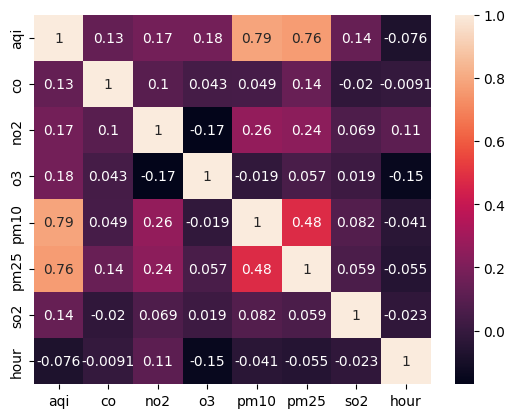

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(correlations,annot=True)

In [26]:
# checking for dupicated columns
data.duplicated().sum()

np.int64(0)

In [27]:
data.head()

,aqi,co,no2,o3,pm10,pm25,so2,city_name,hour
0,128,215.4,25.7,92.1,99.7,45.67,29.2,Ahmedabad,11
1,211,614.5,81.5,37.8,209.0,101.00,39.0,Ahmedabad,10
2,208,534.0,71.0,34.2,201.0,99.00,37.5,Ahmedabad,09
3,206,91.0,40.2,42.0,141.8,97.91,25.5,Ahmedabad,08
4,227,121.0,56.0,61.1,170.8,113.25,45.3,Ahmedabad,07


In [28]:
data.to_csv('datasets/features_datasets.csv',index=False)